In [1]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline

import brightfish
import brightfish.environment as environment
import brightfish.fish as fish

In [2]:
spotlight = environment.Spotlight((101, 101), 500, (75, 75), initial_value=0.75, spot_value=0.5, spot_radius=11)

In [3]:
f = fish.BinocularFish(np.pi/2, (50, 50), static=True, set_point=0.5, max_diff=0.75, learning_rate=1e-2, p_move=0.3, move_dist={'mu': 5.0, 'sigma': 1.0})

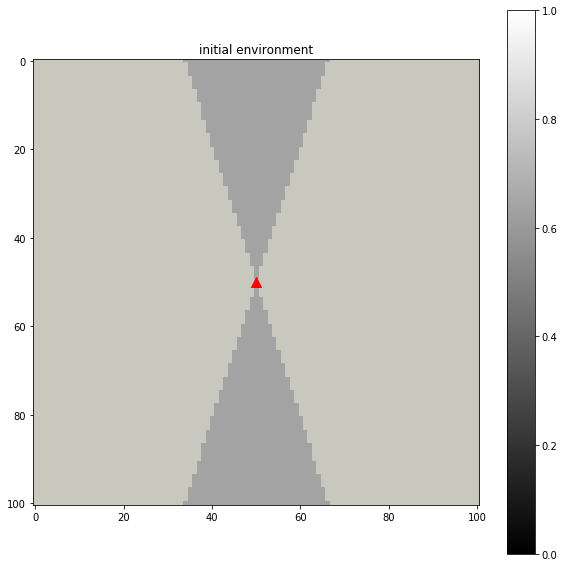

In [4]:
fig = plt.figure(figsize=(10, 10))
plt.imshow(spotlight.stage, cmap='gray', vmin=0, vmax=1)
plt.colorbar()
t = mpl.markers.MarkerStyle(marker='>')
t._transform = t.get_transform().rotate_deg(np.degrees(f.heading))
plt.scatter([f.position[1]], [f.position[0]], c='r', marker=t, s=100)
eyes = np.zeros((101, 101))
eyes[f.right_eye((101, 101))] = 1.0
eyes[f.left_eye((101, 101))] = 1.0
plt.imshow(eyes, cmap='magma', alpha=0.15)
plt.title('initial environment')
plt.show()

In [5]:
# run for some iterations without letting fish move
params_static = f.run(spotlight, 499)
f.static = False
# run for remaining iterations
params_moving = f.run(spotlight, 100)

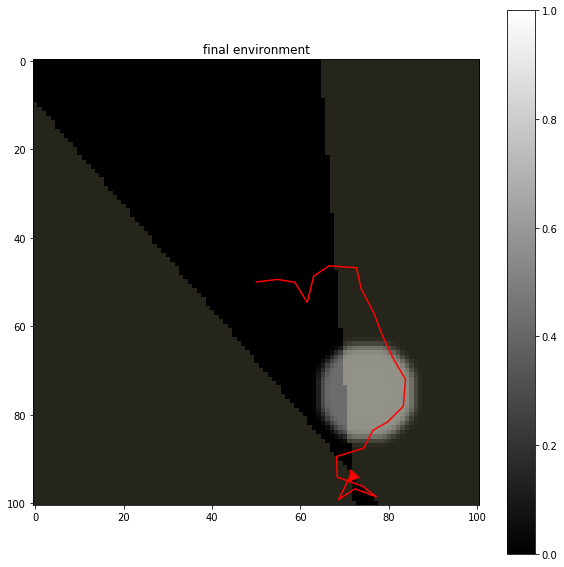

In [6]:
fig = plt.figure(figsize=(10, 10))
plt.imshow(spotlight.stage, cmap='gray', vmin=0, vmax=1)
plt.colorbar()
plt.plot(params_moving['c'], params_moving['r'], c='r')
t = mpl.markers.MarkerStyle(marker='>')
t._transform = t.get_transform().rotate_deg(np.degrees(f.heading))
plt.scatter([f.position[1]], [f.position[0]], c='r', marker=t, s=100)
eyes = np.zeros((101, 101))
eyes[f.right_eye((101, 101))] = 1.0
eyes[f.left_eye((101, 101))] = 1.0
plt.imshow(eyes, cmap='magma', alpha=0.15)
plt.title('final environment')
plt.show()

In [7]:
# repeat path collection multiple times
param_collection = []
for i in range(25):
    spotlight.reset()
    f = fish.BinocularFish(np.pi/2, (np.random.randint(20, 80), np.random.randint(20, 60)), static=True, set_point=0.5, max_diff=0.75, learning_rate=1e-3, p_move=0.2, move_dist={'mu': 5.0, 'sigma': 1.0})
    _ = f.run(spotlight, 499)
    f.static = False
    params_i = f.run(spotlight, 100)
    param_collection.append(params_i)

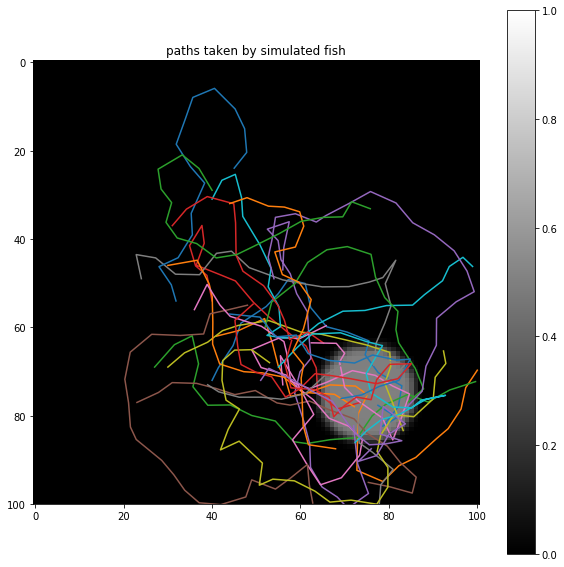

In [8]:
fig = plt.figure(figsize=(10, 10))
plt.imshow(spotlight.stage, cmap='gray', vmin=0, vmax=1.0)
plt.colorbar()
for i in range(25):
    plt.plot(param_collection[i]['c'], param_collection[i]['r'])
plt.title('paths taken by simulated fish')
plt.ylim(100)
plt.show()